In [16]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow_datasets'

## Exercises 1
**1.) What are the advantages of a CNN over a fully-connected DNN for image classification?**
    A.) Big-picture view of features, rather than looking at them individually
    B.) A degree of translation invariance
    C.) Parameter sharing = less parameters = faster computations + less memory

In [2]:
# Exercise 8

(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()

assert X.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
from sklearn.model_selection import train_test_split

m = len(y)

VAL_RATIO = len(y_test) / m

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_RATIO)

X_train.shape

(50000, 28, 28)

In [5]:
NUM_CLASSES = 10

y_train_onehot = tf.one_hot(y_train, NUM_CLASSES)
y_val_onehot = tf.one_hot(y_val, NUM_CLASSES)

In [6]:
print(y_train_onehot.shape)
print(y_val_onehot.shape)

(50000, 10)
(10000, 10)


In [7]:
def plothistory(hist):
    pd.DataFrame(hist).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)  # vertical range: [0, 1]
    plt.show()

Epoch 1/15


C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


391/391 [==============================] - 18s 45ms/step - loss: 38.0038 - mean_absolute_error: 4.3696 - val_loss: 0.2552 - val_mean_absolute_error: 4.3939
Epoch 2/15
391/391 [==============================] - 18s 45ms/step - loss: 0.1654 - mean_absolute_error: 4.3696 - val_loss: 0.1493 - val_mean_absolute_error: 4.3939
Epoch 3/15
391/391 [==============================] - 18s 45ms/step - loss: 0.1402 - mean_absolute_error: 4.3696 - val_loss: 0.3170 - val_mean_absolute_error: 4.3939
Epoch 4/15
391/391 [==============================] - 18s 45ms/step - loss: 0.1302 - mean_absolute_error: 4.3696 - val_loss: 0.1261 - val_mean_absolute_error: 4.3939
Epoch 5/15
391/391 [==============================] - 18s 45ms/step - loss: 0.1146 - mean_absolute_error: 4.3696 - val_loss: 0.1546 - val_mean_absolute_error: 4.3939
Epoch 6/15
391/391 [==============================] - 18s 45ms/step - loss: 0.1301 - mean_absolute_error: 4.3696 - val_loss: 0.1604 - val_mean_absolute_error: 4.3939
Epoch 7/15
391

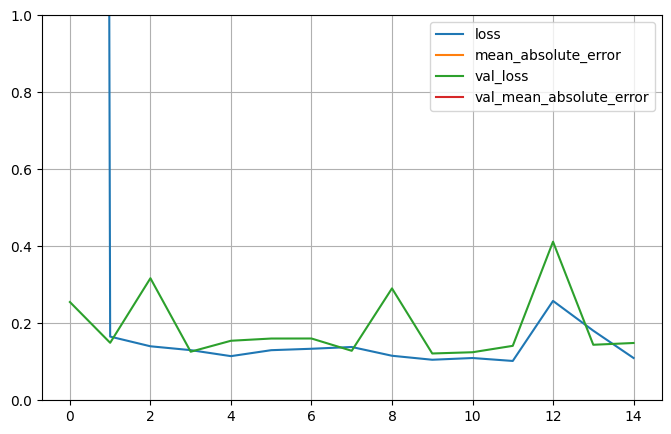

In [14]:
# standard model
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2D, Activation, Flatten, Dense, BatchNormalization
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping

standard_model = Sequential([
    Input(shape=(28, 28, 1)),
    
    Conv2D(32, kernel_size=(4, 4), strides=(1, 1), padding="same", kernel_initializer="he_uniform"), # detect features
    Activation("relu"),                                                                              # activate
    MaxPooling2D(pool_size=(2, 2), padding="valid"),                                                 # condense
    
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2), padding="valid"),
    
    Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2), padding="valid"),
    
    Flatten(),
    
    Dense(128, kernel_initializer="he_uniform"),
    Activation("relu"),
    
    Dense(64, kernel_initializer="he_uniform"),
    Activation("relu"),
    
    Dense(NUM_CLASSES, activation="softmax", kernel_initializer="he_uniform")
])

standard_model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), 
                       optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = standard_model.fit(X_train, y_train,
                             batch_size=128, epochs=15,
                             validation_data=(X_val, y_val),
                             callbacks=[])

plothistory(history.history)

Epoch 1/15
391/391 [==============================] - 21s 51ms/step - loss: 3.8641 - mean_absolute_error: 4.3696 - val_loss: 0.2955 - val_mean_absolute_error: 4.3939
Epoch 2/15
391/391 [==============================] - 20s 51ms/step - loss: 0.1642 - mean_absolute_error: 4.3696 - val_loss: 0.1562 - val_mean_absolute_error: 4.3939
Epoch 3/15
391/391 [==============================] - 20s 51ms/step - loss: 0.1358 - mean_absolute_error: 4.3696 - val_loss: 0.1186 - val_mean_absolute_error: 4.3939
Epoch 4/15
391/391 [==============================] - 20s 51ms/step - loss: 0.1217 - mean_absolute_error: 4.3696 - val_loss: 0.1859 - val_mean_absolute_error: 4.3939
Epoch 5/15
391/391 [==============================] - 20s 51ms/step - loss: 0.1069 - mean_absolute_error: 4.3696 - val_loss: 0.1522 - val_mean_absolute_error: 4.3939
Epoch 6/15
391/391 [==============================] - 20s 51ms/step - loss: 0.1030 - mean_absolute_error: 4.3696 - val_loss: 0.1790 - val_mean_absolute_error: 4.3939
Epoc

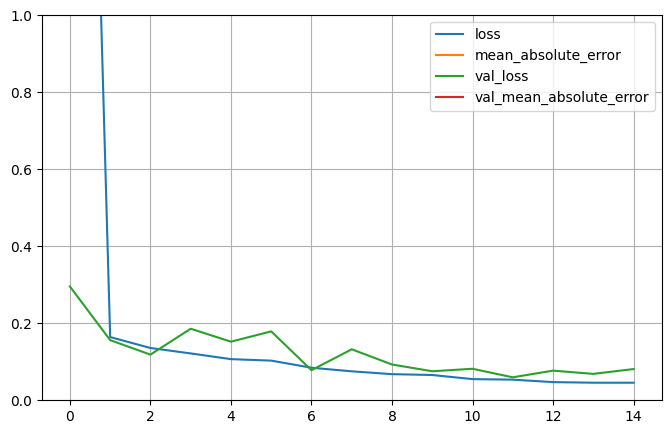

In [15]:
from keras.layers import SeparableConv2D

standard_model = Sequential([
    Input(shape=(28, 28, 1)),
    
    SeparableConv2D(32, kernel_size=(4, 4), strides=(1, 1), padding="same", kernel_initializer="he_uniform"), # detect features
    Activation("relu"),                                                                              # activate
    MaxPooling2D(pool_size=(2, 2), padding="valid"),                                                 # condense
    
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2), padding="valid"),
    
    Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2), padding="valid"),
    
    Flatten(),
    
    Dense(128, kernel_initializer="he_uniform"),
    Activation("relu"),
    
    Dense(64, kernel_initializer="he_uniform"),
    Activation("relu"),
    
    Dense(NUM_CLASSES, activation="softmax", kernel_initializer="he_uniform")
])

standard_model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), 
                       optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
                       metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = standard_model.fit(X_train, y_train,
                             batch_size=128, epochs=15,
                             validation_data=(X_val, y_val),
                             callbacks=[])

plothistory(history.history)

In [17]:
!pip3 install tensorflow_datasets

  Using cached tensorflow_datasets-4.8.0-py3-none-any.whl (5.2 MB)
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Using cached etils-0.9.0-py3-none-any.whl (140 kB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached tensorflow_metadata-1.12.0-py3-none-any.whl (52 kB)
  Using cached importlib_resources-5.10.2-py3-none-any.whl (34 kB)
  Using cached googleapis_common_protos-1.57.0-py2.py3-none-any.whl (217 kB)



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import tensorflow_datasets as tfds

(train_split, val_split, test_split) = ("train[:70%]", "train[70%:85%]", "train[85%:]")
(training_set, validation_set, test_set), dataset_info = tfds.load("tf_flowers", split=[train_split, val_split, test_split], 
                                                         with_info=True, as_supervised=True)

dataset_info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='C:\\Users\\night\\tensorflow_datasets\\tf_flowers\\3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [24]:
class_names = dataset_info.features["label"].names
num_classes = dataset_info.features["label"].num_classes
training_set_size = dataset_info.splits["train"].num_examples

print(class_names)
print(num_classes)
print(training_set_size)

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
5
3670


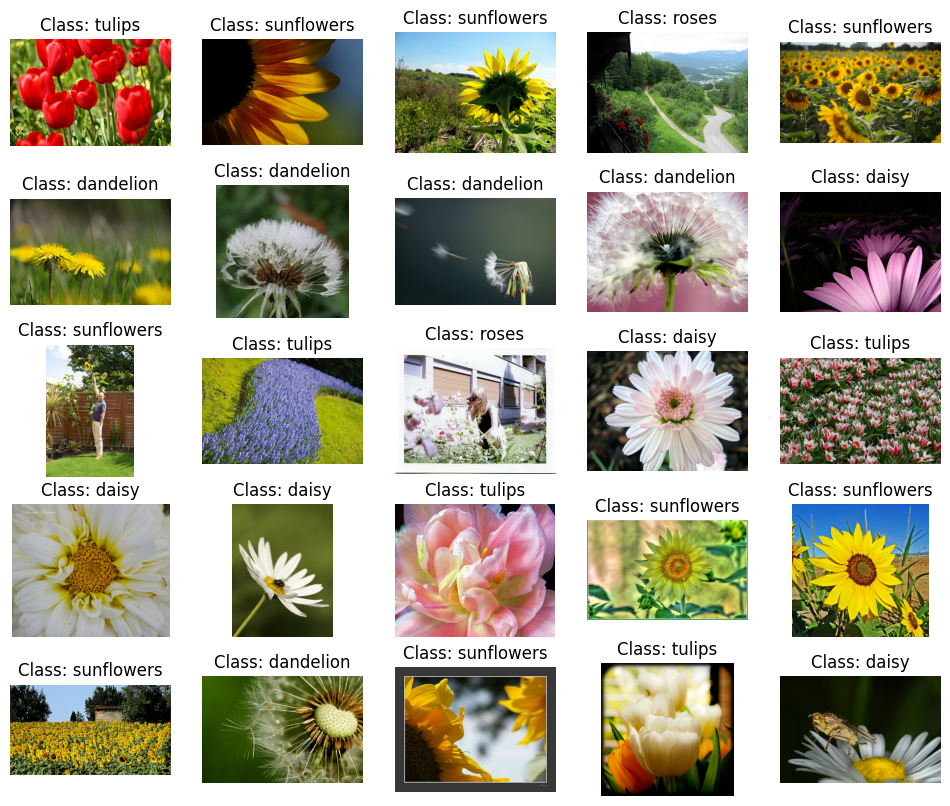

In [40]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in training_set.take(25):
    index += 1
    plt.subplot(5, 5, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [28]:
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input, decode_predictions

IMAGE_RES = 224
BATCH_SIZE = 32

def preprocess_flower(image, label):
    image_resized = tf.image.resize(image, [IMAGE_RES, IMAGE_RES]) / 255.0
    img = preprocess_input(image_resized)
    
    return img, label

train_batches = (training_set
                   .shuffle(training_set_size // 4)
                   .map(preprocess_flower)
                   .batch(BATCH_SIZE)
                   .prefetch(1))

validation_batches = (validation_set
                        .map(preprocess_flower)
                        .batch(BATCH_SIZE)
                        .prefetch(1))
            
test_batches = (test_set
                  .map(preprocess_flower)
                  .batch(BATCH_SIZE)
                  .prefetch(1))
            

print(train_batches)
print(validation_batches)
print(test_batches)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [49]:
resnet_model = ResNet101(include_top=False, weights="imagenet", input_shape=(IMAGE_RES, IMAGE_RES, 3))

resnet_layers = len(resnet_model.layers)
for index, layer in enumerate(resnet_model.layers):
    print(index, layer.name)
    layer.trainable = False

0 input_10
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_b

Epoch 1/5
80/80 [==============================] - 167s 2s/step - loss: 1.8247 - accuracy: 0.3223 - val_loss: 1.4761 - val_accuracy: 0.3621
Epoch 2/5
 1/80 [..............................] - ETA: 34s - loss: 1.5787 - accuracy: 0.2222WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 400 batches). You may need to use the repeat() function when building your dataset.


80/80 [==============================] - 29s 365ms/step - loss: 1.5787 - accuracy: 0.2222 - val_loss: 1.5603 - val_accuracy: 0.2665


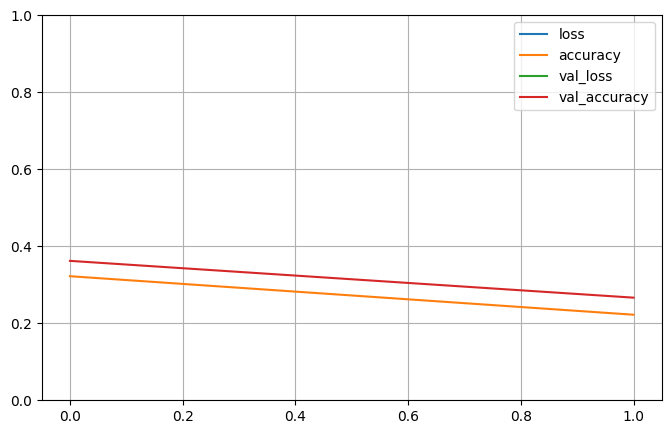

In [51]:
# Model Time!
from keras.layers import GlobalAveragePooling2D, PReLU
from keras.models import Model

global_avg_pool = GlobalAveragePooling2D()(resnet_model.output)
fc1 = Dense(100, kernel_initializer="he_normal")(global_avg_pool)
fc1 = PReLU()(fc1)
output_layer = Dense(num_classes, activation="softmax")(fc1)  # yes, we are using double softmax

model_with_resnet = Model(inputs=resnet_model.input, outputs=output_layer)

#print(model_with_resnet.summary())

model_with_resnet.compile(loss=SparseCategoricalCrossentropy(from_logits=True), 
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["accuracy"])

history = model_with_resnet.fit(train_batches, validation_data=validation_batches,
                                steps_per_epoch=int(0.70 * training_set_size / BATCH_SIZE),
                                validation_steps=int(0.15 * training_set_size / BATCH_SIZE),
                                epochs=5)

plothistory(history.history)